In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

# Bi-variate linear regression

# 1.1. Basic approach - least square estimate
One of the basic models to try, while learning dependence between two real-valued variables $X$ and $Y$ is linear:
$$
y=w_1 x + w_0.
$$
Admitting that the model's accuracy is not be absolute: 
$$
y=w_1 x + w_0 +\varepsilon,\hspace{5ex} (1)
$$
where $\varepsilon$ is the model's error (often called noise or residual).

The objective is to learn $b$ given a training set of $\{(x_i, y_i), i=1..N\}$. Usually the objetive is to find $w=(w_1,w_0)$ providing the best possible fit of the model, i.e. minimizing absolute values of the errors
$\varepsilon_i=x_i-w_1 y_i-w_0$.

Most common quality function for the given model is the residual sum of squares:
$$
RSS(w)=\sum\limits_i \varepsilon_i^2=\sum\limits_i (y_i-w_1 x_i-w_0)^2. \hspace{5ex} (2)
$$
Minimizing $RSS(w)\to min$ is called a least square approach. With respect to this criteria, regression becomes an optimization problem
$$
\hat{w}=argmin_w RSS(w). \hspace{5ex} (3)
$$
Luckily this problem has a precise analytic solution following from function's shape and local extremum criteria:
$$
\left\{\begin{array}{c}\frac{\partial RSS(\hat{w})}{\partial w_1}=0,\\ \frac{\partial RSS(\hat{w})}{\partial w_0}=0.\end{array}\right.
$$
i.e.
$$
\left\{\begin{array}{c}\sum\limits_i 2x_i(y_i-\hat{w}_1 x_i-\hat{w}_0)=0,\\ \sum\limits_i 2(y_i-\hat{w}_1 x_i-\hat{w}_0)=0,\end{array}\right.
$$
$$
\left\{\begin{array}{c}\hat{w}_1\left(\sum\limits_i (x_i)^2\right)+\hat{w}_0\left(\sum\limits_i x_i\right)=\sum\limits_i x_i y_i,\\ \hat{w}_1\left(\sum\limits_i x_i\right)+N \hat{w}_0=\sum\limits_i y_i,\end{array}\right.
$$
$$
\left\{\begin{array}{c}\hat{w}_1=\frac{\sum\limits_i x_i y_i-\left(\sum\limits_i y_i\right)\left(\sum\limits_i x_i\right)/N}{\sum\limits_i (x_i)^2-\left(\sum\limits_i x_i\right)^2/N}=\frac{E[XY]-E[X]E[Y]}{E[X^2]-E[X]^2}=\frac{E[X-E[X]][Y-E[X]]}{var[X]}=\frac{cov(X,Y)}{var[X]}=corr[X,Y]\frac{std[Y]}{std[X]},\\
\hat{w}_0=\frac{\sum\limits_i y_i-\hat{w}_1\left(\sum\limits_i x_i\right)}{N}=E[Y]-E[X]\hat{w}_1\end{array}\right.
$$

# 1.2. Probabilistic approach

Uncertainty of the model (1) prediction can be expressed by considering $\varepsilon$ as a random variable representing deviations of the actual values of $y$ from the estimates provided by the precise linear model. A basic assumption is to have $\varepsilon\sim{\cal N}(0,\sigma^2)$ (mean is zero as otherwise the intercept term $w_0$ could be corrected accordingly). 

Often observations $y_i,x_i$ are spread in time ($i$ - could be time of the observation). 
Classical regression assumptions (Gauss-Markov): $\sigma$ is the same for all observations (does not depend on time) and errors $\varepsilon_i$ following ${\cal N}(0,\sigma^2)$ are mutually uncorrelated, i.e. $cov(\epsilon_i,\epsilon_j)=0$ for $i\neq j$. 

An alternative way of representing this linear model is by considering $y$ a random variable and expressing it's conditional probability density function with respect to given $x$ and $w$ as
$$
p(y|x,w)={\cal N}(y|w_1 x+w_0,\sigma^2).\hspace{5ex} (4)
$$

This way it is actually the mean of the distribution (4) which is predicted by a linear model/
Now the problem is to fit unknown parameters of the model $w_1,w_0,\sigma$ (the last one $\sigma$ represents how usually close are the values of $y$ to the linear prediction), so that the model is the most consistent with the training data $\{(x_j,y_j), j=1..N\}$.

Fitting could be done through through maximizing the likelihood that the observed data $y_j$ actually follows the suggested distribution (4). Likelihood is defined as a product of probability density values $\prod\limits_j p(y_j|x_j)$. But it's actually more practical to maximize the log-likelihood (which is equivalent):
$$
\log\left(\prod\limits_j p(y_j|x_j)\right)=\sum\limits_j \log\left({\cal N}(y|w_1 x+w_0,\sigma^2)\right)=
$$$$
=-\sum\limits_j \frac{(y_j-w_1 x_j+w_0)^2}{2\sigma^2}- N \log(\sigma)-N \log(\sqrt{2\pi})\to\max
$$
Optimization with respect to $w$ turns out to be equivalent to the above least-square minimization (3). Then for minimal $RSS(\hat{w})$ acheived, $\sigma$ could be found from
$$
\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)\to\min
$$$$
\frac{\partial\frac{RSS(\hat{w})}{2\sigma^2}+N\log(\sigma)}{\partial \sigma}=0,
$$$$
-\frac{RSS(\hat{w})}{\sigma^3}+\frac{N}{\sigma}=0,
$$$$
\sigma^2=\frac{RSS(\hat{w})}{N}.
$$

### Example One: Toy example.
$y=5x+10+\varepsilon$

$\varepsilon\sim{\cal N}(0,\sigma^2)$ and $\sigma=10$

In [3]:
#Generate data:
np.random.seed(100)
error=np.random.normal(0,10,10)
X=range(10)

In [4]:
error

array([-17.49765473,   3.42680403,  11.53035803,  -2.52436037,
         9.81320787,   5.14218841,   2.21179669, -10.70043331,
        -1.89495831,   2.55001444])

In [5]:
X

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### (1) Let's generate y and prepare the data for using

In [6]:
#1. What is the type of X,error?
print type(X)
print type(error)

<type 'list'>
<type 'numpy.ndarray'>


In [7]:
#2. Change the type of X, to np array
X=np.asarray(X)

In [8]:
print type(X)
print type(error)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [9]:
#3.Generate y
y=5*X+10+error
y

array([ -7.49765473,  18.42680403,  31.53035803,  22.47563963,
        39.81320787,  40.14218841,  42.21179669,  34.29956669,
        48.10504169,  57.55001444])

In [10]:
# Pandas Data frame
#1.Make the pandas dataframe.
data=pd.DataFrame([list(X),list(y)]).T
data.head(3)

,0,1
0,0.0,-7.497655
1,1.0,18.426804
2,2.0,31.530358


In [11]:
#2. Change the name for column 0 and 1
data.columns=["x","y"]
data

,x,y
0,0.0,-7.497655
1,1.0,18.426804
2,2.0,31.530358
3,3.0,22.475640
4,4.0,39.813208
5,5.0,40.142188
6,6.0,42.211797
7,7.0,34.299567
8,8.0,48.105042
9,9.0,57.550014


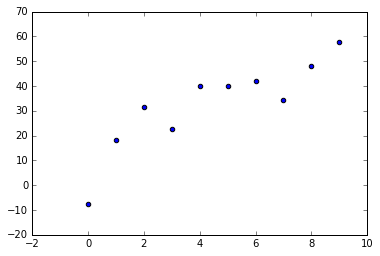

In [12]:
#visulize the data.
import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(data.x,data.y)
plt.show()

#### (2) Use OLS to estimate the coefficients by hands

In [13]:
#Take a quick look at the data
data.describe()

,x,y
count,10.00000,10.000000
mean,4.50000,32.705696
std,3.02765,18.194432
min,0.00000,-7.497655
25%,2.25000,24.739319
50%,4.50000,37.056387
75%,6.75000,41.694395
max,9.00000,57.550014


#### Correlation. Very important for linear model. If you don't know what is it, check:https://en.wikipedia.org/wiki/Correlation_and_dependence 

In [14]:
#Take a look the correlation of X and y
data.corr()

,x,y
x,1.000000,0.873941
y,0.873941,1.000000


In [15]:
#Calculate the coefficient. We have closed form for it by OLS.

$$
\left\{\begin{array}{c}\hat{w}_1=\frac{\sum\limits_i x_i y_i-\left(\sum\limits_i y_i\right)\left(\sum\limits_i x_i\right)/N}{\sum\limits_i (x_i)^2-\left(\sum\limits_i x_i\right)^2/N}\\
\hat{w}_0=\frac{\sum\limits_i y_i-\hat{w}_1\left(\sum\limits_i x_i\right)}{N}\end{array}\right.
$$

In [16]:
#2.1 get xy and x-squred term 
data.loc[:,"x_sqr"]=data.x*data.x
data.loc[:,"xy"]=data.x*data.y
data.head(3)

,x,y,x_sqr,xy
0,0.0,-7.497655,0.0,-0.000000
1,1.0,18.426804,1.0,18.426804
2,2.0,31.530358,4.0,63.060716


In [17]:
#2.2 Let's calculate w1. 
w1=(data.xy.sum()-data.y.sum()*data.x.sum()/len(data))/(data.x_sqr.sum()-data.x.sum()*data.x.sum()/len(data))
print("w1 is : {}".format(w1))

w1 is : 5.25187988624


In [18]:
#2.3 let's calculate w0.
w0=(data.y-data.x*w1).mean()
print("w0 is : {}".format(w0))

w0 is : 9.0722367887


In [19]:
#2.4. Let's get predicted values and errors
data.loc[:,"pred"]=w1*data.x+w0
data.loc[:,"err"]=data.y-data.pred
data.head(3)

,x,y,x_sqr,xy,pred,err
0,0.0,-7.497655,0.0,-0.000000,9.072237,-16.569892
1,1.0,18.426804,1.0,18.426804,14.324117,4.102687
2,2.0,31.530358,4.0,63.060716,19.575997,11.954361


In [20]:
#2.5. Calculate R-squared.
R_2=1-(data.err**2).sum()/((data.y-data.y.mean())**2).sum()
R_2

0.7637724875971592

#### (3)Let's try package from statsmodels to double check our answer

In [21]:
lm = smf.ols(formula='y ~ x', data = data).fit()

In [22]:
print lm.params
print lm.rsquared

Intercept    9.072237
x            5.251880
dtype: float64
0.763772487597


In [23]:
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     25.87
Date:                Thu, 22 Sep 2016   Prob (F-statistic):           0.000946
Time:                        13:26:18   Log-Likelihood:                -35.459
No. Observations:                  10   AIC:                             74.92
Df Residuals:                       8   BIC:                             75.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.0722      5.513      1.646      0.1

/Users/YueCai/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


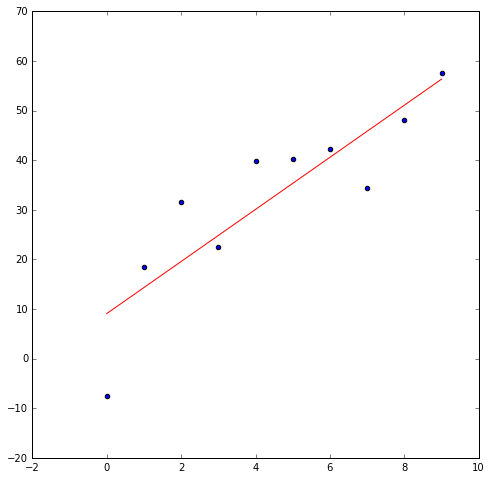

In [24]:
#7. Visulize the model 
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(8,8))
plt.scatter(X,y)
plt.plot(data.x,data.pred,c="r")
plt.show()

### Excerise. Real-world example 

#### q1. Real Estate Prices in NYC

This is the data on multi-apartment house sale prices in the zip code 10466 (Bronx). Let's see how sale price depends on the house size (besides other relevant parameters)

In [48]:
data_3=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/data/NYC_RE_10466__multi.csv",index_col=0)
data_3.index=range(len(data_3))
data_3.head()

,gross_sq_feet,sale_price
0,7745,700000.0
1,3700,335000.0
2,5250,510000.0
3,4082,285000.0
4,4082,198558.0


In [26]:
#Q0. What is the min/max of gross_sq_feet and sale_price?

In [28]:
#Q1. What is the correlation of gross_sq_feet and sale_price?

In [29]:
#Q2. Visulize the data set as points.

In [30]:
#Q3. Get w1,w2 and R-squared.(Feel free to calculate by hand or use the package/any packages.)

In [31]:
#Q4. write "error" and "pred" term into the datafram, and what is the correlation between error and gross_sq_feet

In [32]:
#Q5. Plot the predicted values and observations.

#### q2. Example 2.  (The data set includes total population, and earning per capita for most cities in US.  We want to explore "Total earning ~ Population")

In [33]:
data_4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/Session02/population_earning.csv")

In [34]:
data_4.head()

,city,Population,Earning_per_capita
0,Aaronsburg,1267.0,19563.0
1,Abbeville,53422.0,18485.6
2,Abbot,717.0,23897.0
3,Abbotsford,2884.0,23461.0
4,Abbott,1145.0,26713.0


In [35]:
data_4.loc[:,["Population","Earning_per_capita"]].describe()

,Population,Earning_per_capita
count,1.722500e+04,17225.000000
mean,1.844530e+04,26075.115473
std,7.837758e+04,11044.535384
min,7.000000e+00,409.000000
25%,7.520000e+02,20168.000000
50%,2.699000e+03,24152.000000
75%,1.111400e+04,29375.000000
max,3.042954e+06,392835.000000


In [36]:
#q1.How many observations do we have? (shape)

In [37]:
#q2. What are the top 10 biggest cities by population?

#### Prepare data for regression.

In [38]:
#q3. Generate a new column "Total_earning"="Population"*"Earning_per_capita" in the data frame.

In [39]:
#q4. Rank data_4 by population and take the top 6-105 cities.  Save this 100 cities data as data_5.

In [40]:
# q5. Visulize the data. (Population, Total_earning) 

#### Linear regression

In [41]:
# q6. Linear Model: Total_earning=w1*Population+w0  and get w1,w0 and R-squared. And plot the result.

#### Log Scale matters. Let's model this:  $y=w_0*x^{w_1}$ or $lny=w_1*lnx+lnw_0$

In [42]:
#q7. generate two new columns: log_Population and log_Total_earning in data_5 using np.log() function.

In [43]:
#q8. Estimate the linear model on the log scale data. Get w1, and plot the result.

### What does w1 you get mean? 

## Additional Exercise (If we have time, we will see this example on a special artificial data set) As usual, we want to explore:  y~x. If we do not have time, please do it at home.

In [25]:
x=range(30)

In [26]:
y=[10.510002888546763,12.763363507489128,227.31000343834808,22.859913338863414,
 29.791177713218744,34.083946028994752,36.500469053890605,45.870326976245785,
 51.345441611419325,251.73761940797698,62.306071605127286,265.55676014854777,
 283.6155612514533,76.962641573902459,79.496241721573568,86.028437682788763,
 88.937439246296179,94.495127926957224,103.23796332135052,107.05946537026669,
 110.4423593384428,114.62100833835365,118.31512852349741,123.83280989935467,
130.3690373811279,344.37082201108956,143.08321034902681,145.68536080665501,
 149.2372875459116,156.63369414337157]

In [ ]:
#Question: y=w1*x+w0. Model it and analyze your result. What is your w1 and R-squared? Do you find any problem?

#### * outliers (google those models to take a look). Just run the code to take a look.
sklearn.linear_model.RANSACRegressor

sklearn.linear_model.TheilSenRegressor

In [44]:
#  Use "Ctrl+A" to select all codes in this cell.
#  Use "Ctrl+/" to remove/add comments.

#Q6
from sklearn import linear_model
#this step is important since the API of this model only take this shape of data
X=np.asarray(data2.x).reshape(len(data2),1)
y=np.asarray(data2.y)
# Fit line using all data
model = linear_model.LinearRegression()
model.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(0, 30)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

# Compare estimated coefficients
print("Estimated coefficients (true, normal, RANSAC):")
print(5, model.coef_, model_ransac.estimator_.coef_)

plt.figure(figsize=(8,8))
plt.plot(X[inlier_mask], y[inlier_mask], '.g', label='Inliers')
plt.plot(X[outlier_mask], y[outlier_mask], '.r', label='Outliers')
plt.plot(line_X, line_y, '-k', label='Linear regressor')
plt.plot(line_X, line_y_ransac, '-b', label='RANSAC regressor')
plt.legend(loc='lower right')
plt.show()